<center> <h1> <b>BIRDSONGS - SYLLABLES<b></h1> </center>
<center> <h4>Tutorial to Generate Synthetic Syllables </h4> </center>

---

# Table of Contents

- [Define Objects](#define-objects)
- [Syllables Creation](#syllables-creation)
  - [Optimizer Object](#optimizer-object)
  - [Optimal Parameters](#optimal-parameters)
    - [Optimal $\gamma$](#optimal)
    - [Optimal Motor Gesture ($\alpha$ and $\beta$)](#optimal-motor-gesture--and-)
  - [Synthetic Syllables](#synthetic-syllables)
    - [Generating](#generating)
    - [Visualizing](#visualizing)
    - [Lestening](#listening)
    - [Exporting](#exporting)
- [Conclusions](#conclusions)
- [References](#references)

---

## Define Objects

First, import the package objects and functions. Additionally, define the Matplotlib backend to enable interaction with plots.

>[!NOTE]
>the following line enable interact with figures,   you can make zoom and save images from a poup matplotlib window to select points: qt ipympl tk. To just visualize: notebook


In [1]:
%matplotlib ipympl

import birdsongs as bs
from birdsongs.util import *

playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


Now, define the directories for the audio, root, and results folders where all the generated data will be stored. Next, create the path and plotter objects, and enable image saving. The catalog argument is created to import audios download from [XenoCanto](https://xeno-canto.org/) or [eBird](https://ebird.org/home) where you can download several audios with some metadata that is stored in a spreedsheet.csv file (you can create one or just change to false catalog).

**NOTE:**
*When using the catalog parameter the audio files must be en the same folder as the catalog file, at audios folder, if it not the case you will get an error.*

In [2]:
root    = "../examples/"   # "path\\to\\main_folder\\' 
audios  = "audios"         # "path\\to\\audios\\' 
results = "results"        # "path\\to\\results\\'

paths   = bs.Paths(root, audios, results, catalog=False)  # root_path, audios_path, catalog
plotter = bs.Plotter(save=True)                           # to not save figures change save to False 
Audios = paths.AudioFiles(verbose=True)

Audios path: ../examples/audios

The folder has 2 songs:
  574179401 - Zonotrichia Capensis.wav
  XC388622 - Ocellated Tapaculo - Acropternis orthonyx.mp3


You can work with single audio files or import the catalog file and play many samples

In [3]:
paths1   = bs.Paths(root, audios, results, catalog=True, spreadsheet="spreadsheet.csv")  # root_path, audios_path, catalog
plotter1 = bs.Plotter(save=True)                           # to not save figures change save to False 
Audios1  = paths1.AudioFiles()
Audios1.head()

,ML Catalog Number,Format,Common Name,Scientific Name,Background Species,Recordist,Date,Year,Month,Day,...,Parent Species,eBird Species Code,Taxon Category,Taxonomic Sort,Recordist 2,Average Community Rating,Number of Ratings,Asset Tags,Original Image Height,Original Image Width
0,165970,Audio,Rufous-collared Sparrow,Zonotrichia capensis,<NA>,Matthew Sarver,12/22/2009,2009,12,22,...,Zonotrichia capensis,rucspa1,Species,32629,<NA>,4.0,4,<NA>,<NA>,<NA>
1,472617231,Audio,Rufous-collared Sparrow,Zonotrichia capensis,<NA>,Mauricio Alvarez,8/1/2022,2022,8,1,...,Zonotrichia capensis,rucspa1,Species,32629,<NA>,5.0,1,<NA>,<NA>,<NA>
2,472617221,Audio,Rufous-collared Sparrow,Zonotrichia capensis,<NA>,Mauricio Alvarez,8/1/2022,2022,8,1,...,Zonotrichia capensis,rucspa1,Species,32629,<NA>,4.0,1,<NA>,<NA>,<NA>
3,167949711,Audio,Rufous-collared Sparrow,Zonotrichia capensis,<NA>,Juan Gutierrez,4/12/2019,2019,4,12,...,Zonotrichia capensis,rucspa1,Species,32629,<NA>,5.0,2,<NA>,<NA>,<NA>
4,187313411,Audio,Rufous-collared Sparrow,Zonotrichia capensis,<NA>,Diego Cueva,11/10/2019,2019,11,10,...,Zonotrichia capensis,rucspa1,Species,32629,<NA>,4.5,2,<NA>,<NA>,<NA>


In [4]:
selected = Audios1[(Audios1['Country'] == 'Colombia')]
selected.head()

,ML Catalog Number,Format,Common Name,Scientific Name,Background Species,Recordist,Date,Year,Month,Day,...,Parent Species,eBird Species Code,Taxon Category,Taxonomic Sort,Recordist 2,Average Community Rating,Number of Ratings,Asset Tags,Original Image Height,Original Image Width
0,165970,Audio,Rufous-collared Sparrow,Zonotrichia capensis,<NA>,Matthew Sarver,12/22/2009,2009,12,22,...,Zonotrichia capensis,rucspa1,Species,32629,<NA>,4.0,4,<NA>,<NA>,<NA>
1,472617231,Audio,Rufous-collared Sparrow,Zonotrichia capensis,<NA>,Mauricio Alvarez,8/1/2022,2022,8,1,...,Zonotrichia capensis,rucspa1,Species,32629,<NA>,5.0,1,<NA>,<NA>,<NA>
2,472617221,Audio,Rufous-collared Sparrow,Zonotrichia capensis,<NA>,Mauricio Alvarez,8/1/2022,2022,8,1,...,Zonotrichia capensis,rucspa1,Species,32629,<NA>,4.0,1,<NA>,<NA>,<NA>
3,167949711,Audio,Rufous-collared Sparrow,Zonotrichia capensis,<NA>,Juan Gutierrez,4/12/2019,2019,4,12,...,Zonotrichia capensis,rucspa1,Species,32629,<NA>,5.0,2,<NA>,<NA>,<NA>
4,187313411,Audio,Rufous-collared Sparrow,Zonotrichia capensis,<NA>,Diego Cueva,11/10/2019,2019,11,10,...,Zonotrichia capensis,rucspa1,Species,32629,<NA>,4.5,2,<NA>,<NA>,<NA>


To examplify the objects, lets create a path without a catalog and work with a single audio sample. The object can be create without passing arguments and the default values are:`root_path="../examples/",` `audios_path='audios'`, `results="results"`, `catalog=False`.

We can use any of the three samples included in the project. To test with other samples, you can add audio files to the folder `path_to_birdsongs\examples\audios` or define the `audios` argument in the Paths object.

Now, let's create our first birdsong. Start by creating a birdsong object and specifying the `file_id` with the number or name of the audio file of interest. This object also allows you to define the time interval, frequency limits, FFT window length (NN), and other parameters. It is important to mention that longer audio files require more processing time, resulting in slower rendering. Conversely, shorter audio files will be plotted more quickly.

To visualize the sample you have to use the plotter object, and to hear the birdsong jus use the `AudioPlay` function from `birdsongs.util`. In the same plot, since it is interactive, you can select any part of the birdsongs such as a syllable, for that just put `SelecTime_on=True` and select the start and end of the syllable you want to generate. It is also possible to make several selections to define several syllables.

To get a better performance in the plot you can shorter the time interval.

/home/saguileran/birds/venv/lib/python3.12/site-packages/mpl_point_clicker/_clicker.py:186: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._fig.canvas.draw()


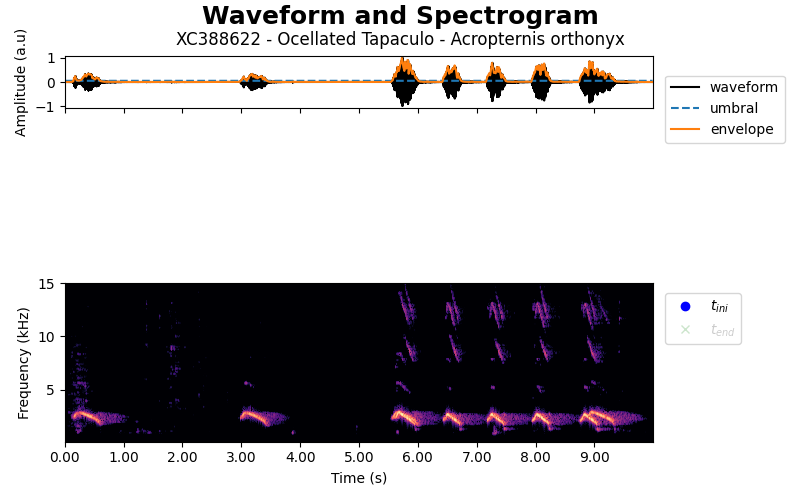

In [5]:
birdsong = bs.BirdSong(paths, file_id="XC388622", tlim=(0, 10), NN=512, flim=(1e2,15e3))
plotter.Plot(birdsong, FF_on=False, SelectTime_on=True)
AudioPlay(birdsong)

Get the first pair of points selected

In [ ]:
time_interval = Positions(plotter.klicker)[0]
print("Time interval selected: initial time {:.4f} s, final time {:.4f} s".format(time_interval[0], time_interval[1]))

Finally, define the birdsong of interest using the time interval previously selected. You can change the `umbral_FF` parameter to improve the fundamental frequency computing or define a syllable number and type to characterize them 

In [ ]:
syllable = bs.Syllable(birdsong, tlim=time_interval, Nt=5, NN=512, umbral_FF=1.05,
                       no_syllable=0, type="intro-plane")
plotter.Plot(syllable, FF_on=True)
AudioPlay(syllable)

If you want to verify more closly the fundamental frequency over time uncomment any of the following lines

In [ ]:
# plt.figure(); plt.plot(syllable.FF, 'o'); plt.show(); plt.ylim((0, 3.5e4));
# syllable.FF

#### 3D Plot (coming soon)

In [ ]:
#plotter.Plot3d(birdsong)

#### Define Several Syllables Automatic (coming soon)

In [ ]:
# no_syllable    = int(input("Enter the syllable number (1 to {0}): ".format(bird.no_syllables)))
# syllable       = birdsong.Syllable(no_syllable=3)
# plotter.Plot(syllable)
# AudioPlay(syllable)

In [ ]:
# plotter.Plot(birdsong, FF_on=False, syllable_on=True, chunck_on=False)

## Syllable Creation

### Optimizer Object

It's time to solve the minimization problem associated. For that let's create an optimization object, define the method to solve the optimization problem and pass the parameters required for the method

In [ ]:
#?lmfit.minimize # Check the methods available
brute     = {'method':'brute', 'Ns': 11 } # , "workers":-1}
optimizer = bs.Optimizer(syllable, method_kwargs=brute)

### Optimal Parameters

#### Optimal $\gamma$

To solve the general optimization problem, it will be divided into three subproblems. The first subproblem is to find the optimal $\gamma$ for all the syllables computed by the syllable extractor or for a single syllable. From previous works and package testing a good value for $\gamma$ is 37000 for some birds, not all.

In [ ]:
#optimal_gamma = optimizer.OptimalGamma(syllable)    
optimal_gamma = 37000 # optimizer.AllGammas(birdsong)
syllable.p["gm"].set(value=optimal_gamma)

Therefore, the values to be found and the feasible region (the region where we are searching for the optimal parameter values) are:

In [ ]:
Display(syllable.p)

If you have previously computed the optimal parameters and just want to use them to generate a birdsong, you can pass all the values simultaneously to the syllable object or modify the parameters object to change any specific values.

In [ ]:
#              [a0, a1, a2, b0, b1, b2]
# syllable.Set([0.058, 0, 0, -0.25, 1, 1.4])

# syllable.p["a0"].set(value=0.1060)
# syllable.p["b0"].set(value=-0.1)
# syllable.p["b1"].set(value=1.2)
# syllable.p["b2"].set(value=0)

It is also possible to adjust the physical model parameters and experiment with them, such as changing the trachea length, the reflection coefficient, and other variables.

In [ ]:
# syllable.BirdData["parameter_name"] = parameter_value
syllable.BirdData

#### Optimal Motor Gesture ($\alpha$ and $\beta$)

Now, let's solve the bigger proble, find the air-sac pressure ($\alpha$) and labial tension constant ($\beta$) variables, i.e., find the optimal motor gesture curve. Here you can select a different grid size by changing the Ns argument.

In [ ]:
optimizer.OptimalParams(syllable, Ns=11)

In [ ]:
Display(syllable.p)

### Synthetic Syllable

#### Generating

Finally, let's generate a synthetic birdsong from the real sample. We will define a new syllable object using the `Solve` method on the real sample and passing the optimal parameters object obtained. You can change single parameter values using `syllable.p["b0"].set(value=-0.175)` where you have to cahnge the parameter name and value.

In [ ]:
synth_syllable = syllable.Solve(syllable.p)

#### Visualizing

Visualize and plot the synthetic syllable alongside a comparison with the real sample.

In [ ]:
plotter.PlotVs(synth_syllable)

In [ ]:
plotter.PlotAlphaBeta(synth_syllable)

In [ ]:
plotter.Scores(syllable, synth_syllable)

In [ ]:
plotter.Syllables(syllable, synth_syllable, figsize=(10,6))

#### Listening

In [ ]:
AudioPlay(syllable)

In [ ]:
AudioPlay(synth_syllable)

#### Exporting

Write the motor gesture parameter of the synthetic audio

In [ ]:
synth_syllable.ExportMotorGestures()

write the audios, real and synthetic

In [ ]:
syllable.WriteAudio()
synth_syllable.WriteAudio()

---

# Conclusions

- This tutorial how to generate comparable birdsongs from recorded samples. 

# References

- [Design, development, and evaluation of a computational physical model to generate synthetic birdsongs from recorded samples](https://github.com/saguileran/birdsongs/blob/dissertation/dissertation.pdf)
- [BirdSongs repository - Github](https://saguileran.github.io/birdsongs/)
- [LSD - Laboratorio de Sistemas Dinámicos - UBA](http://www.lsd.df.uba.ar/)